# Package Usage

In [1]:
from clingraph import Clingraph

### Create a clingraph from string

In [2]:
g = Clingraph()
g.add_fact_string('node(oscar). node(andres). edge((oscar,andres)). attr(node,andres,label,"Mai").attr(edge,(oscar,andres),label,"friends").')
g.compute_graphs()

##### Show facts after preprocessing

In [3]:
print(g.facts)

node(andres,default).
node(oscar,default).
attr(edge,(oscar,andres),(label,-1),"friends").
attr(node,andres,(label,-1),"Mai").
edge((oscar,andres),default).
graph(default).



##### Show graphs in the UI

'default'

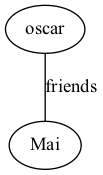

In [4]:
g.show()

##### Print a clingraph source code

In [5]:
print(g)

//----------default----------
graph default {
	andres [label=Mai]
	oscar
	oscar -- andres [label=friends]
}



### Create a clingraph from file

'toms_family'

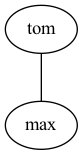

'bills_family'

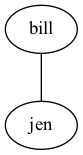

In [6]:
g = Clingraph()
g.add_fact_file("examples/basic/example2/example_2.lp")
g.compute_graphs()
g.show()

'toms_family'

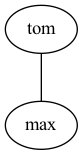

In [7]:
g.show(selected_graphs=['toms_family'])

##### Show source code for one graph

In [8]:
print(g.source(selected_graphs=['toms_family']))

//----------toms_family----------
graph toms_family {
	tom
	max
	tom -- max
}



Directly by accessing the graphviz object

In [9]:
print(g.graphs['toms_family'].source)

graph toms_family {
	tom
	max
	tom -- max
}



##### Save all graphs 

In [10]:
g.save(directory="out",format="pdf")

## Clingo integration

### Create a clingraph from each model in the clingos solve

In [1]:
from clingraph import MultiModelClingraph
from clingo import Control
from clingo.script import enable_python
ctl = Control(["-n2"])
g = MultiModelClingraph()
ctl.load("./examples/elevator/encoding.lp")
ctl.load("./examples/elevator/viz.lp")
ctl.load("./examples/elevator/instance.lp")
ctl.ground([("base", [])])
ctl.solve(on_model=g.add_model)
g.compute_graphs()

#### Obtain the clingraph for the first model

In [2]:
cl = g.get_cligraph(1)

#### Show gif for the clingraph only for the first 5 time steps

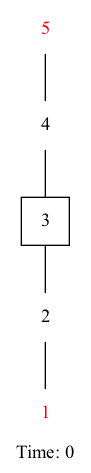

In [3]:
cl.show_gif(engine="neato",fps=1, selected_graphs=range(0,5))

#### Show image for the first time step

'1'

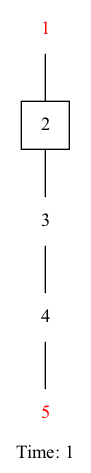

In [21]:
cl.show(selected_graphs=['1'])

#### Show the source code of all the models

In [4]:
print(g)


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------0----------
graph 0 {
	graph [bgcolor=white label="Time: 0"]
	"(1,0)" [label=1 fontcolor=red hight=0.5 pos="0,2" shape=none width=0.5]
	"(2,0)" [label=2 hight=0.5 pos="0,3" shape=none width=0.5]
	"(4,0)" [label=4 hight=0.5 pos="0,5" shape=none width=0.5]
	"(5,0)" [label=5 fontcolor=red hight=0.5 pos="0,6" shape=none width=0.5]
	"(3,0)" [label=3 hight=0.5 pos="0,4" shape=square width=0.5]
	"(1,0)" -- "(2,0)"
	"(2,0)" -- "(3,0)"
	"(4,0)" -- "(5,0)"
	"(3,0)" -- "(4,0)"
}
//----------1----------
graph 1 {
	graph [bgcolor=white label="Time: 1"]
	"(1,1)" [label=1 fontcolor=red hight=0.5 pos="0,2" shape=none width=0.5]
	"(4,1)" [label=4 hight=0.5 pos="0,5" shape=none width=0.5]
	"(2,1)" [label=2 hight=0.5 pos="0,3" shape=square width=0.5]
	"(5,1)" [label=5 fontcolor=red hight=0.5 pos="0,6" shape=none width=0.5]
	"(3,1)" [label=3 hight=0.5 pos="0,4" shape=none width=0.5]
	"(1,1)" -- "(2,1)"
	"(4,1)" --